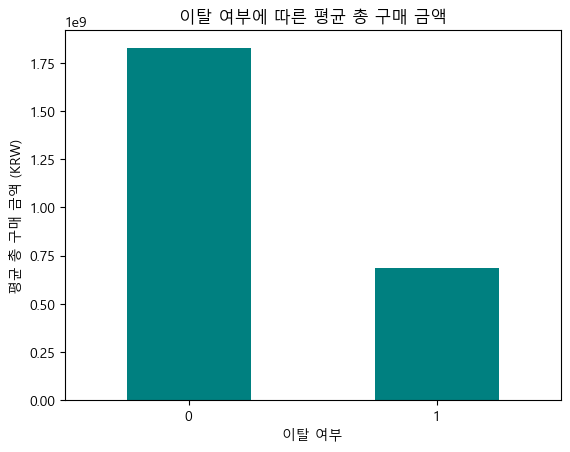

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
data = pd.read_csv('preprocessed_data.csv')

# 이탈 여부별 평균 총 구매 금액 계산
churn_purchase_amounts = data.groupby('이탈 여부')['총 구매 금액'].mean()

# 막대그래프로 시각화
churn_purchase_amounts.plot(kind='bar', color='teal')
plt.xlabel('이탈 여부')
plt.ylabel('평균 총 구매 금액 (KRW)')
plt.title('이탈 여부에 따른 평균 총 구매 금액')
plt.xticks(rotation=0)
plt.show()


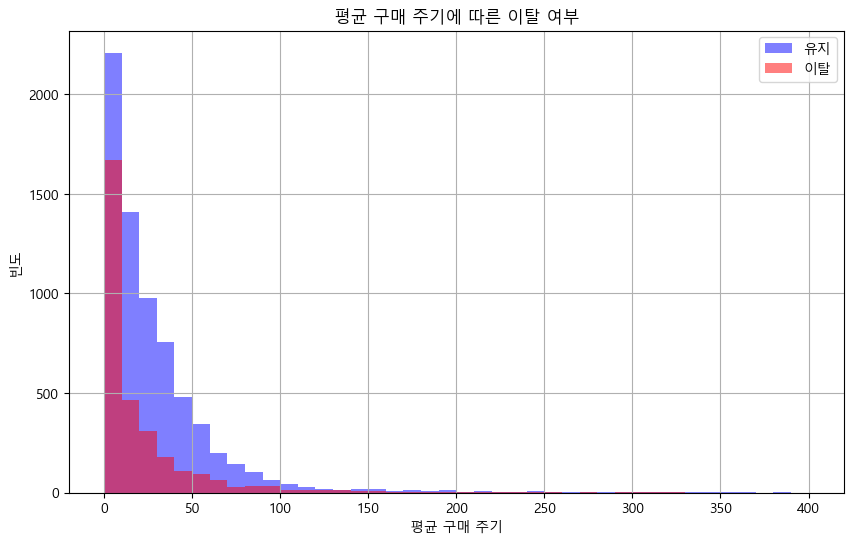

In [60]:
# 그래프 설정
plt.figure(figsize=(10, 6))
ax = plt.gca()  # 현재 축을 가져옴

# 유지 고객 히스토그램
data[data['이탈 여부'] == 0].hist(column='평균 구매 주기', bins=40, alpha=0.5, label='유지',
                                  ax=ax, range=(0, 400), color='blue')

# 이탈 고객 히스토그램
data[data['이탈 여부'] == 1].hist(column='평균 구매 주기', bins=40, alpha=0.5, label='이탈',
                                  ax=ax, range=(0, 400), color='red')

plt.xlabel('평균 구매 주기')
plt.ylabel('빈도')
plt.title('평균 구매 주기에 따른 이탈 여부')
plt.legend()
plt.show()

데이터 집중: 대부분의 고객이 100일 이내의 평균 구매 주기를 가지고 있으며, 이는 유지 고객과 이탈 고객 모두에게 해당됩니다. 이는 짧은 구매 주기가 고객 유지 전략에 중요할 수 있음을 시사합니다.

이탈 고객의 분포: 이탈 고객들 역시 초기 구매 주기 구간에 높은 빈도를 보이며, 이 구간에서 유지 고객의 수와 크게 차이 나지 않습니다. 이는 초기 고객 관리가 이탈 방지에 중요할 수 있음을 나타냅니다.

구매 주기와 이탈 여부: 구매 주기가 늘어남에 따라 이탈 고객의 수는 감소하는 경향을 보이며, 유지 고객의 수도 감소하긴 하지만 상대적으로 느리게 감소합니다. 이는 장기적으로 구매 주기가 긴 고객들이 상대적으로 더 안정적으로 유지될 가능성이 높음을 시사합니다.

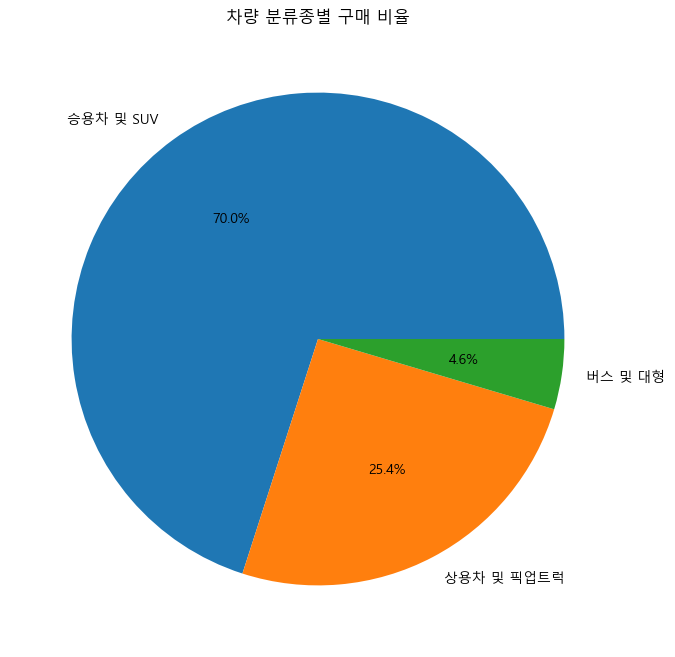

In [44]:
# 분류종별 구매 비율 계산
vehicle_categories = data['분류종'].value_counts(normalize=True)

# 원그래프로 시각화
plt.figure(figsize=(8, 8))
vehicle_categories.plot(kind='pie', autopct='%1.1f%%', labels=vehicle_categories.index)
plt.title('차량 분류종별 구매 비율')
plt.ylabel('')  # y축 레이블 제거
plt.show()


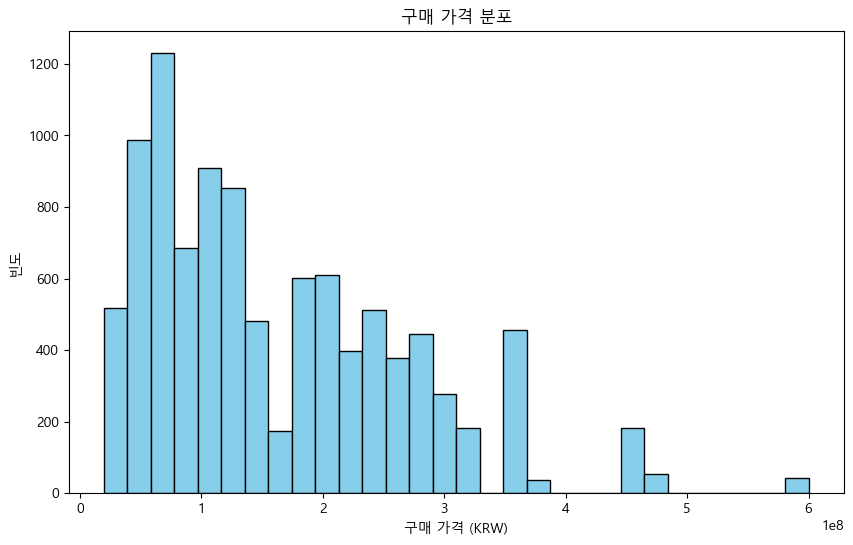

In [40]:
# 구매 가격 분포 시각화
plt.figure(figsize=(10, 6))
plt.hist(data['구매 가격'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('구매 가격 (KRW)')
plt.ylabel('빈도')
plt.title('구매 가격 분포')
plt.show()

[0 1]
지역
강원특별자치도    0.339578
경기도        0.240625
경상남도       0.306291
경상북도       0.272993
광주광역시      0.287395
대구광역시      0.285978
대전광역시      0.305228
부산광역시      0.321821
서울특별시      0.363775
세종특별자치시    0.344907
울산광역시      0.317629
인천광역시      0.327674
전라남도       0.363758
전북특별자치도    0.321663
제주특별자치도    0.318907
충청남도       0.319465
충청북도       0.228125
Name: 이탈 여부, dtype: float64


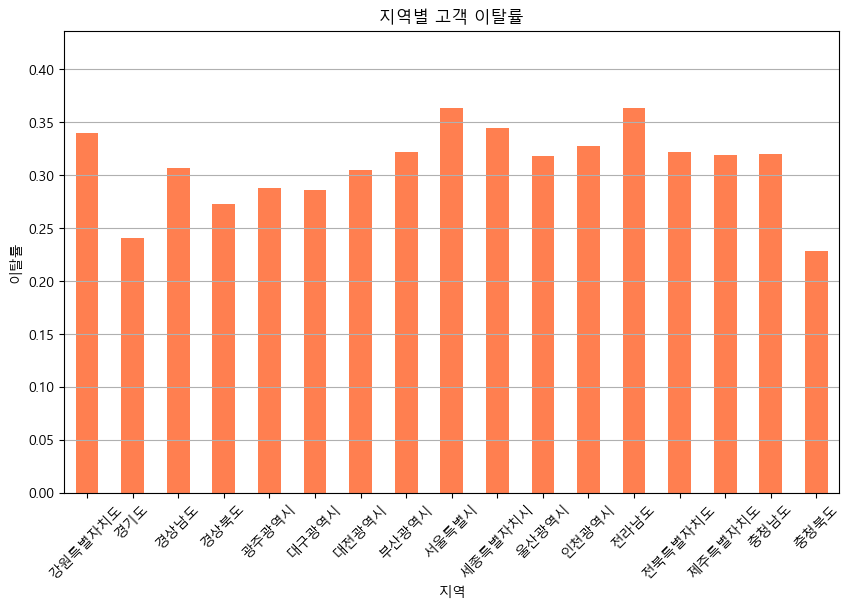

In [62]:

# 이탈 여부의 유니크 값 확인
print(data['이탈 여부'].unique())

# 지역별 이탈률 계산 (이탈 여부가 1과 0으로 표기)
region_churn_rate = data.groupby('지역')['이탈 여부'].mean()

# 계산된 이탈률 확인
print(region_churn_rate)

# 막대그래프로 시각화, y축 범위 조정
plt.figure(figsize=(10, 6))
region_churn_rate.plot(kind='bar', color='coral')
plt.xlabel('지역')
plt.ylabel('이탈률')
plt.title('지역별 고객 이탈률')
plt.ylim(0, max(region_churn_rate) * 1.2)  # y축 범위를 최대 이탈률의 120%까지로 설정
plt.xticks(rotation=45)
plt.grid(True, axis='y')  # y축에 그리드 추가